<a href="https://colab.research.google.com/github/ankitarashmi/Project1/blob/master/First_DNN_Session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


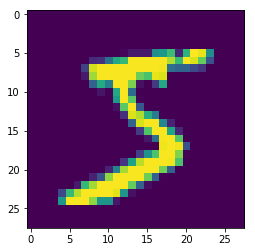

In [6]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#Normalization of Pixels


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Preparing the model
-- Started with vanilla model.Achieved an accuracy of 99.2 for validation data with parameters 169,901

--Used max pooling and 1X1 Convolution to reduce the parameters.Also removed the layer where the channel size was going upto 128 channels. Accuracy went upto 99.3 but not 99.4 with number of parameters upto 19k

-- Used Dropout which improved the accuracy to 99.4 with parameters coming little more than 16k

In [17]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #(26,26,4) RF:3X3
model.add(Convolution2D(32, 3, 3, activation='relu')) #(24,24,32) RF:5X5

model.add(Dropout(0.25))
model.add(MaxPooling2D())
model.add(Convolution2D(16, 1, activation='relu'))  #(12,12,16) RF :7X7

model.add(Convolution2D(32, 3, 3, activation='relu')) #(10,10,32) RF:9X9

model.add(Dropout(0.25))
model.add(MaxPooling2D())
model.add(Convolution2D(16, 1, activation='relu')) #(5,5,16) RF:11X11

model.add(Convolution2D(32, 3, 3, activation='relu'))#(3,3,16) RF:13X13

model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu'))


model.add(Convolution2D(10,3))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 16)        528       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 10, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Modifying the number of epochs to 100 to test the accuarcy and got an accuarcy of 99.4 at 32nd epoch.

In [20]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=100,validation_data=(X_test,Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
  768/60000 [..............................] - ETA: 14s - loss: 0.0273 - acc: 0.9922

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 12s 208us/step - loss: 0.0250 - acc: 0.9918 - val_loss: 0.0274 - val_acc: 0.9922
Epoch 2/100
60000/60000 [==============================] - 14s 229us/step - loss: 0.0220 - acc: 0.9924 - val_loss: 0.0256 - val_acc: 0.9922
Epoch 3/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.0236 - acc: 0.9921 - val_loss: 0.0249 - val_acc: 0.9925
Epoch 4/100
60000/60000 [==============================] - 12s 206us/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.0265 - val_acc: 0.9915
Epoch 5/100
60000/60000 [==============================] - 12s 207us/step - loss: 0.0207 - acc: 0.9931 - val_loss: 0.0241 - val_acc: 0.9929
Epoch 6/100
60000/60000 [==============================] - 12s 208us/step - loss: 0.0227 - acc: 0.9925 - val_loss: 0.0350 - val_acc: 0.9901
Epoch 7/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.0224 - acc: 0.9926 - val_loss: 0.0276 - val_acc: 0.9912
Epoch 8/100
60000/60000 [=======

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.028766399505187293, 0.9919]


In [0]:
y_pred = model.predict(X_test)

In [24]:
print(y_pred[:9])
print(y_test[:9])

[[1.70426245e-19 1.46642987e-09 3.20076493e-10 4.30390966e-12
  3.69266466e-12 3.61888739e-16 4.06370947e-29 1.00000000e+00
  1.07925508e-15 1.78762161e-09]
 [1.08466329e-08 3.43236849e-07 9.99999642e-01 2.81580559e-13
  4.95148401e-11 8.42091425e-14 2.73635767e-11 3.84642040e-11
  2.24507826e-11 2.19785301e-11]
 [1.01480369e-12 9.99991775e-01 2.78667692e-12 4.63454585e-15
  1.39580706e-07 4.51098056e-12 1.58443744e-11 8.02692011e-06
  2.74401942e-11 9.05500119e-11]
 [9.99983549e-01 4.38645404e-13 6.01888104e-08 3.85374976e-09
  1.25545060e-10 3.78844955e-09 1.61723019e-05 6.74134956e-13
  3.44123627e-08 1.14143376e-07]
 [1.07638204e-12 5.26686861e-10 6.03835883e-13 2.08916844e-15
  9.99999404e-01 4.20246928e-11 6.29613428e-09 8.34416494e-11
  9.85767645e-09 5.92021877e-07]
 [6.83792920e-13 9.99992967e-01 5.52775534e-12 5.08871613e-16
  1.14197256e-07 1.63398185e-13 1.88057707e-12 6.95514109e-06
  3.96799867e-12 5.12322684e-10]
 [3.39958794e-25 2.61924669e-07 1.08072497e-16 4.30057299e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [28]:
layer_dict

{'activation_2': <keras.layers.core.Activation at 0x7f4070f5b8d0>,
 'conv2d_17': <keras.layers.convolutional.Conv2D at 0x7f40891a1048>,
 'conv2d_18': <keras.layers.convolutional.Conv2D at 0x7f40898b4908>,
 'conv2d_19': <keras.layers.convolutional.Conv2D at 0x7f40891a15c0>,
 'conv2d_20': <keras.layers.convolutional.Conv2D at 0x7f40891a10f0>,
 'conv2d_21': <keras.layers.convolutional.Conv2D at 0x7f407c02fd30>,
 'conv2d_22': <keras.layers.convolutional.Conv2D at 0x7f407c03f358>,
 'conv2d_23': <keras.layers.convolutional.Conv2D at 0x7f407c05af60>,
 'conv2d_24': <keras.layers.convolutional.Conv2D at 0x7f40d76b62b0>,
 'dropout_7': <keras.layers.core.Dropout at 0x7f407c14cd30>,
 'dropout_8': <keras.layers.core.Dropout at 0x7f407c08db70>,
 'dropout_9': <keras.layers.core.Dropout at 0x7f4070fcf710>,
 'flatten_2': <keras.layers.core.Flatten at 0x7f407c0dc860>,
 'max_pooling2d_5': <keras.layers.pooling.MaxPooling2D at 0x7f407c14cb70>,
 'max_pooling2d_6': <keras.layers.pooling.MaxPooling2D at 0x7f

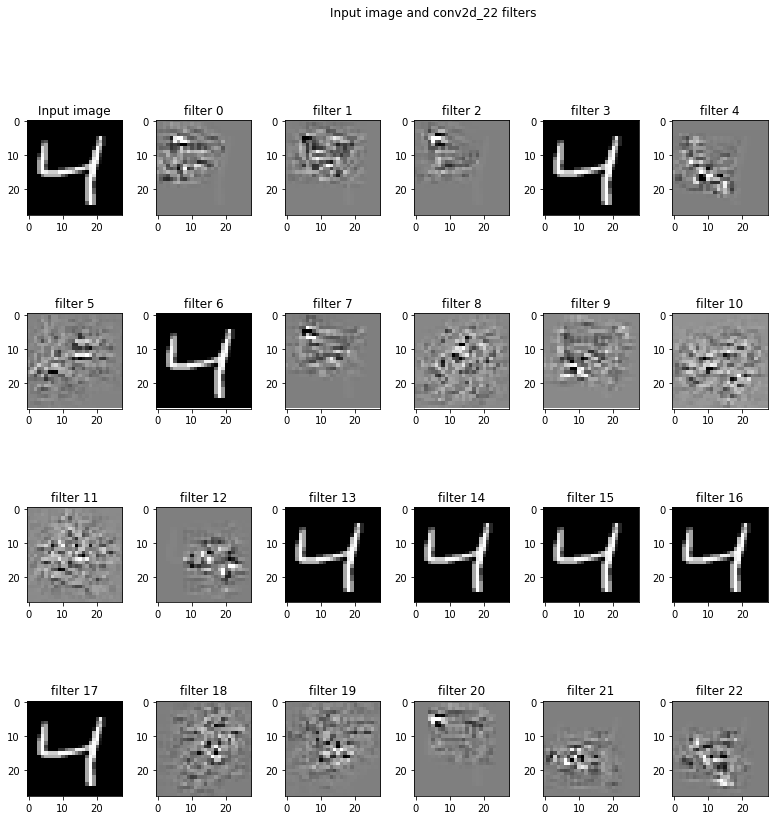

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_22'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()